# Statistics

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from collections import Counter

## Import Data

In [2]:
data_path = "../na_mentions_final/"
data_folders = sorted([folder for folder in os.listdir(data_path)])
output_path = "data/"

In [3]:
data_folders

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

In [4]:
list00 = []
for folder in data_folders[:1]:
    files = [file for file in os.listdir(os.path.join(data_path, folder))]
    print(files)

    for file in files:
        df = pd.read_json(os.path.join(data_path, folder, file))
        print(len(df))
        list00.append(df)

['1_4.jsonl.bz2', '7_5.jsonl.bz2', '5_2.jsonl.bz2', '3_4.jsonl.bz2', '1_7.jsonl.bz2', '8_5.jsonl.bz2', '1_8.jsonl.bz2', '4_4.jsonl.bz2', '6_1.jsonl.bz2', '4_6.jsonl.bz2', '0_0.jsonl.bz2', '3_2.jsonl.bz2', '1_5.jsonl.bz2', '4_5.jsonl.bz2', '6_8.jsonl.bz2', '5_8.jsonl.bz2', '0_7.jsonl.bz2', '9_2.jsonl.bz2', '5_4.jsonl.bz2', '8_2.jsonl.bz2', '3_6.jsonl.bz2', '0_4.jsonl.bz2', '2_2.jsonl.bz2', '2_0.jsonl.bz2', '5_3.jsonl.bz2', '4_2.jsonl.bz2', '0_9.jsonl.bz2', '3_5.jsonl.bz2', '4_8.jsonl.bz2', '6_3.jsonl.bz2', '2_5.jsonl.bz2', '1_3.jsonl.bz2', '8_3.jsonl.bz2', '4_3.jsonl.bz2', '8_7.jsonl.bz2', '5_0.jsonl.bz2', '9_4.jsonl.bz2', '8_8.jsonl.bz2', '2_7.jsonl.bz2', '3_3.jsonl.bz2', '0_3.jsonl.bz2', '1_9.jsonl.bz2', '3_0.jsonl.bz2', '2_8.jsonl.bz2', '0_8.jsonl.bz2', '2_4.jsonl.bz2', '1_2.jsonl.bz2', '9_9.jsonl.bz2', '2_9.jsonl.bz2', '5_6.jsonl.bz2', '4_9.jsonl.bz2', '9_8.jsonl.bz2', '0_2.jsonl.bz2', '1_0.jsonl.bz2', '2_6.jsonl.bz2', '9_7.jsonl.bz2', '9_1.jsonl.bz2', '8_4.jsonl.bz2', '7_6.jsonl.bz

3048
2828
3112
3047
2997
3000
3015
2841
2758
2925
2871
2803
2934
2865
3142
3011
2902
3033
3031
2992
3149
3081
3153
3111
2983
3132
3037
2702
2941
2963
2728
2969
2987
2832
2866
3110
2820
2849
2890
3019
2801
2934
2826
2758
3030
2884
2776
2786
2825
2938
2991
2960
2955
2812
3031
2869
3066
2799
2915
3102
2798
3061
2868
2807
2822
2841
2984
2945
2768
2897
2946
2860
2920
3034
2863
2970
2945
2837
3020
2831
2903
2875
2900
2895
2671
2988
2841
2856
2724
2977
3112
2979
3060
2912
2949
2929
2863
3096


### Importing Everything

In [5]:
list_all = []

for folder in data_folders:
    files = [file for file in os.listdir(os.path.join(data_path, folder))]
    
    print(f"Number of files contained in folder {folder}:", len(files))

    for file in files:
        df = pd.read_json(os.path.join(data_path, folder, file))
        list_all.append(df)

mentions_all = pd.concat(list_all, axis=0, ignore_index=True)

#dropping articleauthor
len_before = len(mentions_all)
mentions_all = mentions_all[mentions_all['entity'] != "pers.ind.articleauthor"]
print(f"Dropped {len_before - len(mentions_all)} rows which contain pers.ind.articleauthor mention")

#infer new columns
mentions_all['split_id'] = mentions_all['id'].str.split("-")
mentions_all['article'] = mentions_all['id'].apply(lambda x: x.split(":")[0])
mentions_all['newspaper'] = mentions_all['split_id'].apply(lambda x: x[0])
mentions_all['date'] = mentions_all['split_id'].apply(lambda x: "-".join(x[1:4]))
mentions_all['year'] = mentions_all['split_id'].apply(lambda x: x[1]).astype(int)
mentions_all['decade'] = mentions_all['year'] // 10 * 10
mentions_all['agency'] = mentions_all['entity'].str.replace("org.ent.pressagency.", "", regex=False)
mentions_all['language'] = mentions_all['id'].apply(lambda x: x[-2:])
#newspapers from Switzerland are uppercase, from Luxembourg lowercase
mentions_all['country'] = ["CH" if entry.isupper() else "LU" for entry in mentions_all['newspaper']]
#correct typo
#mentions_all['agency'] = mentions_all['agency'].str.replace("ATB", "ATS", regex=False)
mentions_all = mentions_all.drop(columns='split_id')

Number of files contained in folder 00: 100


Number of files contained in folder 01: 90
Number of files contained in folder 02: 90
Number of files contained in folder 03: 0
Number of files contained in folder 04: 90
Number of files contained in folder 05: 20
Number of files contained in folder 06: 60
Number of files contained in folder 07: 90
Number of files contained in folder 08: 100
Number of files contained in folder 09: 40
Number of files contained in folder 10: 80
Number of files contained in folder 11: 80
Number of files contained in folder 12: 80
Number of files contained in folder 13: 80
Number of files contained in folder 14: 100
Number of files contained in folder 15: 20
Number of files contained in folder 16: 10
Dropped 130215 rows which contain pers.ind.articleauthor mention


In [6]:
mentions_all.head()

,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country
0,org.ent.pressagency.Havas,Havas,Q2826560,30,35,1,84,89,LLE-1939-11-27-a-i0076:1:30:35:84:89:newsag:be...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,Havas,fr,CH
1,org.ent.pressagency.UP-UPI,United Press,Q493845,2,14,7,595,607,LLE-1939-11-27-a-i0076:7:2:14:595:607:newsag:b...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH
2,org.ent.pressagency.UP-UPI,United Press,Q493845,0,12,10,1364,1376,LLE-1939-11-27-a-i0076:10:0:12:1364:1376:newsa...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH
3,org.ent.pressagency.UP-UPI,United Press,Q493845,2,14,16,2181,2193,LLE-1939-11-27-a-i0076:16:2:14:2181:2193:newsa...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH
4,org.ent.pressagency.UP-UPI,Press,Q493845,48,53,18,2531,2536,LLE-1939-11-27-a-i0076:18:48:53:2531:2536:news...,LLE-1939-11-27-a-i0076,LLE,1939-11-27,1939,1930,UP-UPI,fr,CH


In [7]:
print(f"Languages in corpus: {mentions_all['language'].unique()}")
mentions_fr = mentions_all[mentions_all['language']=="fr"]
mentions_de = mentions_all[mentions_all['language']=="de"]

Languages in corpus: ['fr' 'de']


In [8]:
articles = mentions_all.groupby(['article']).agg({
    'agency': list,
    'surface': list,
    'id': list,
    'sentence_idx:': list,
    'language': 'first',
    'newspaper': 'first',
    'year': 'first',
    'decade': 'first',
}).reset_index()

articles_fr = articles[articles['language']=="fr"]
articles_de = articles[articles['language']=="de"]

In [9]:
articles.head()

,article,agency,surface,id,sentence_idx:,language,newspaper,year,decade
0,BLB-1847-02-13-a-i0001,[unk],[pp],[BLB-1847-02-13-a-i0001:168:0:2:13072:13074:ne...,[168],de,BLB,1847,1840
1,BLB-1847-05-22-a-i0003,[SPK-SMP],[sp],[BLB-1847-05-22-a-i0003:37:0:2:2653:2655:newsa...,[37],de,BLB,1847,1840
2,BLB-1847-07-03-a-i0001,[SPK-SMP],[resp],[BLB-1847-07-03-a-i0001:11:40:44:3285:3289:new...,[11],de,BLB,1847,1840
3,BNN-1886-01-12-a-i0026,[unk],[agSl],[BNN-1886-01-12-a-i0026:1:0:4:14:18:newsag:ber...,[1],de,BNN,1886,1880
4,BNN-1886-01-14-a-i0014,[ag],[Ag.],[BNN-1886-01-14-a-i0014:0:-1:2:-1:2:newsag:ber...,[0],de,BNN,1886,1880


## Basic Stats

In [10]:
print(f"Total number of agency mentions: {len(mentions_all)}")
print(f"Total number of articles with agency mentions: {len(articles)}\n")

print(f"Number of mentions in French corpus: {len(mentions_fr)}")
print(f"Number of articles in French corpus: {len(articles_fr)}\n")

print(f"Number of mentions in German corpus: {len(mentions_de)}")
print(f"Number of articles in German corpus: {len(articles_de)}")

Total number of agency mentions: 2476666
Total number of articles with agency mentions: 1331183

Number of mentions in French corpus: 1577454
Number of articles in French corpus: 970443

Number of mentions in German corpus: 899212
Number of articles in German corpus: 360740


<AxesSubplot: title={'center': '#articles per decade'}, ylabel='Frequency'>

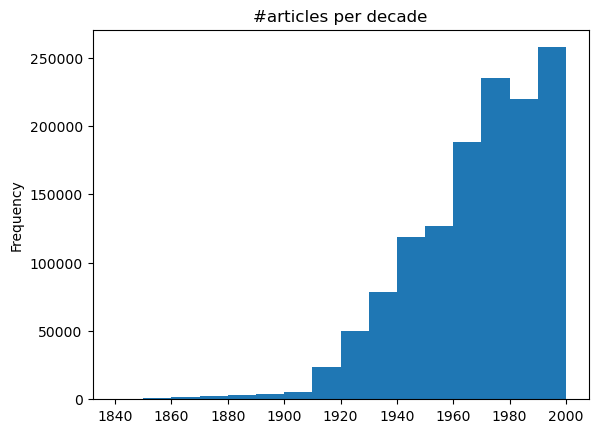

In [11]:
decades = list(range(1840, 2010, 10))
articles['decade'].plot.hist(bins=decades, title="#articles per decade")

In [12]:
articles['decade'].value_counts()

1970    235117
1980    219857
1960    188610
1990    164175
1950    126718
1940    118605
2000     93432
1930     78739
1920     50086
1910     23642
2010     13212
1900      5294
1890      3961
1880      3322
1870      2735
1860      1956
1850       884
1840       426
1830       151
1820        86
1800        58
1810        47
1790        44
1780        26
Name: decade, dtype: int64

<AxesSubplot: title={'center': '#articles per newspaper'}, xlabel='newspaper'>

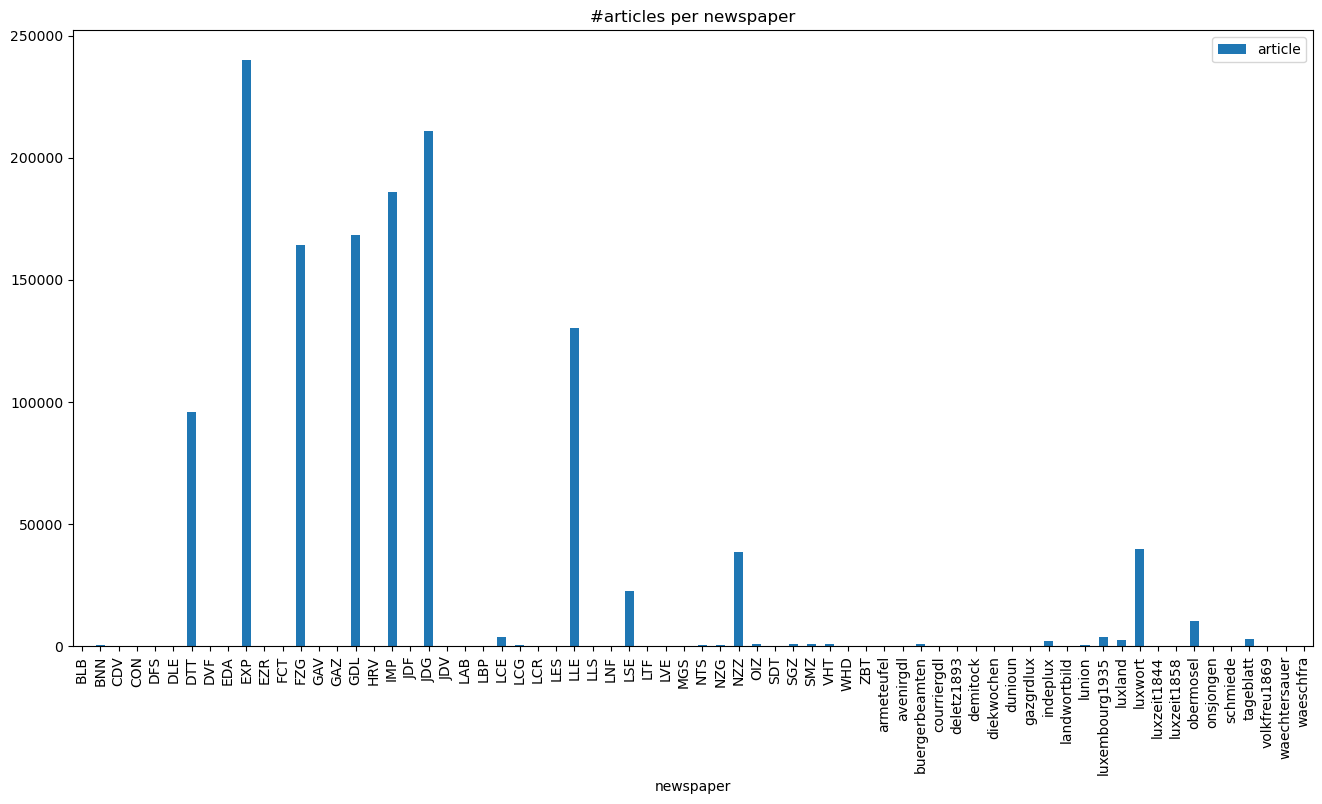

In [13]:
articles[['article', 'newspaper']].groupby('newspaper').count().plot.bar(figsize=(16,8), title="#articles per newspaper")

In [14]:
articles['newspaper'].value_counts()

EXP             240182
JDG             211033
IMP             186114
GDL             168514
FZG             164135
                 ...  
EDA                  3
BLB                  3
demitock             2
landwortbild         1
JDV                  1
Name: newspaper, Length: 68, dtype: int64

<AxesSubplot: title={'center': '#mentions per agency'}, xlabel='agency'>

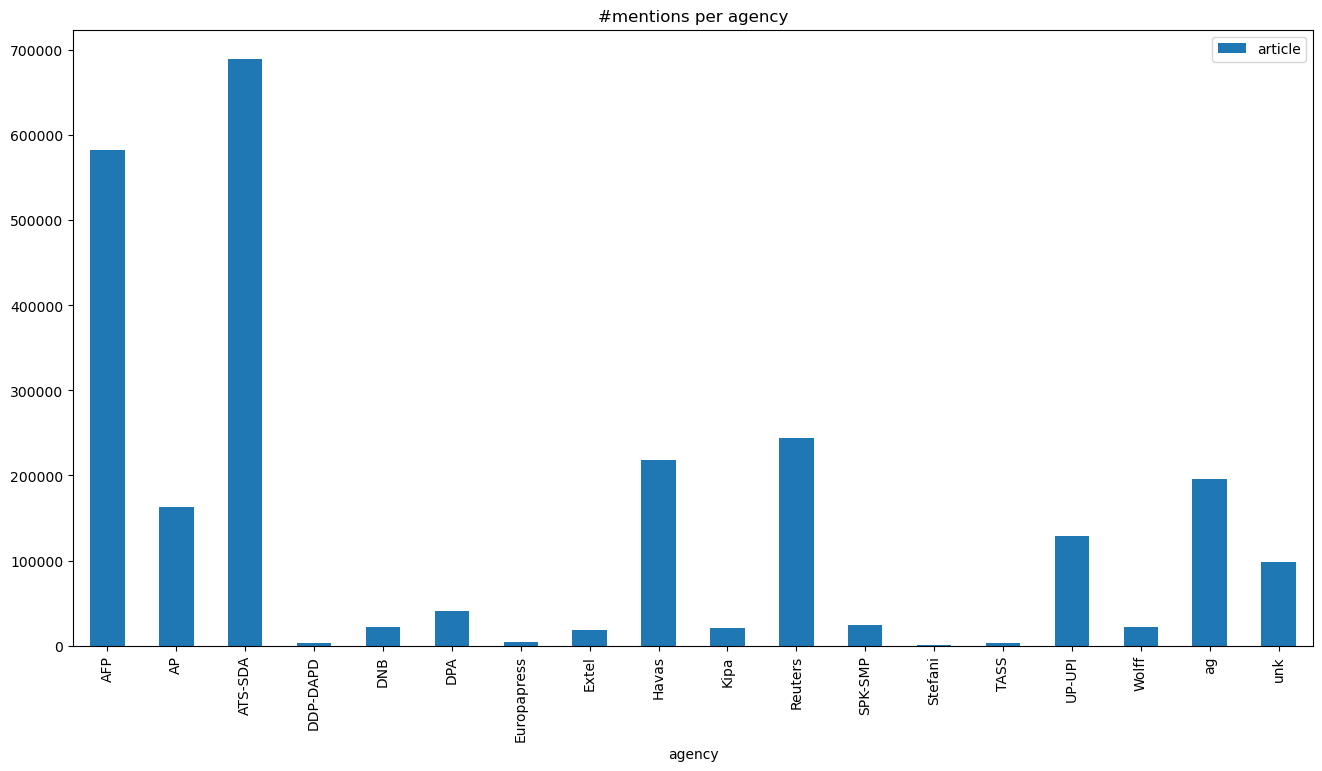

In [15]:
mentions_all[['article', 'agency']].groupby('agency').count().plot.bar(figsize=(16,8), title="#mentions per agency")

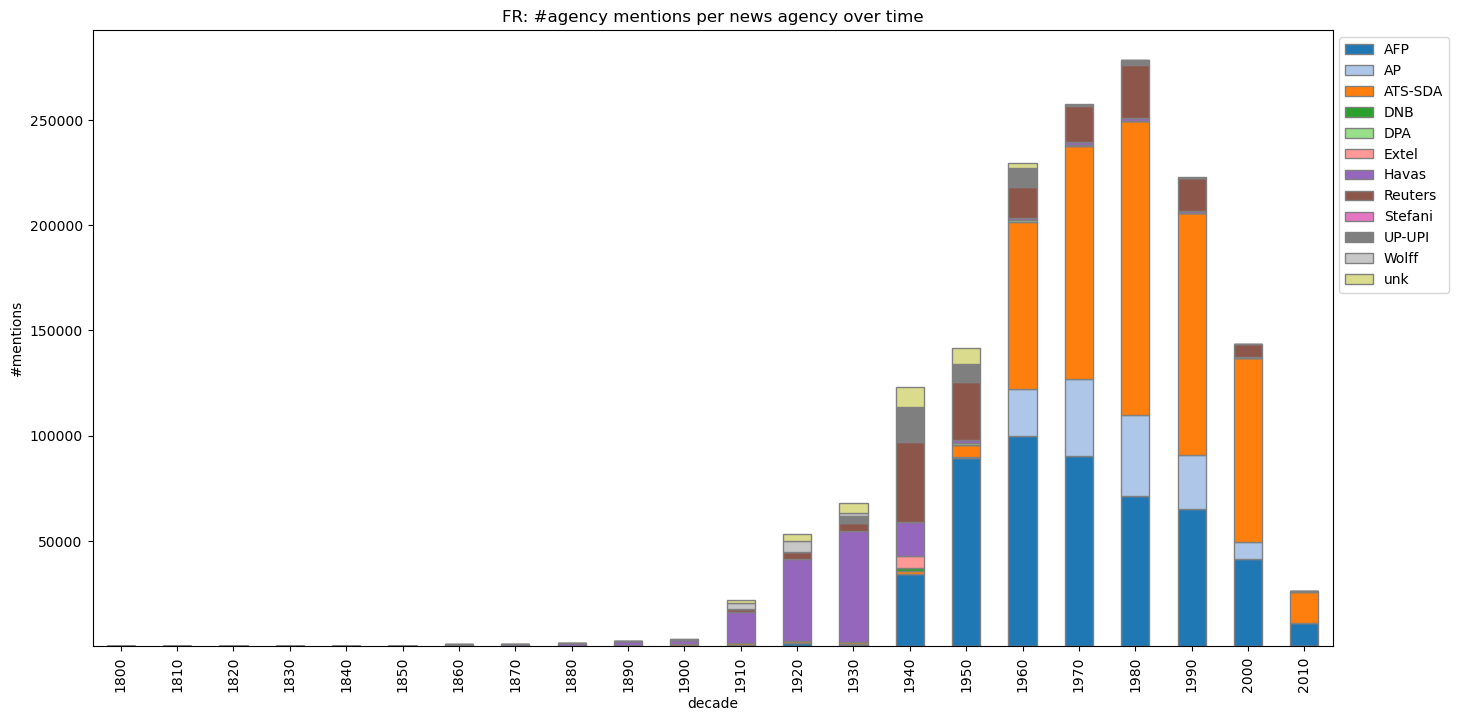

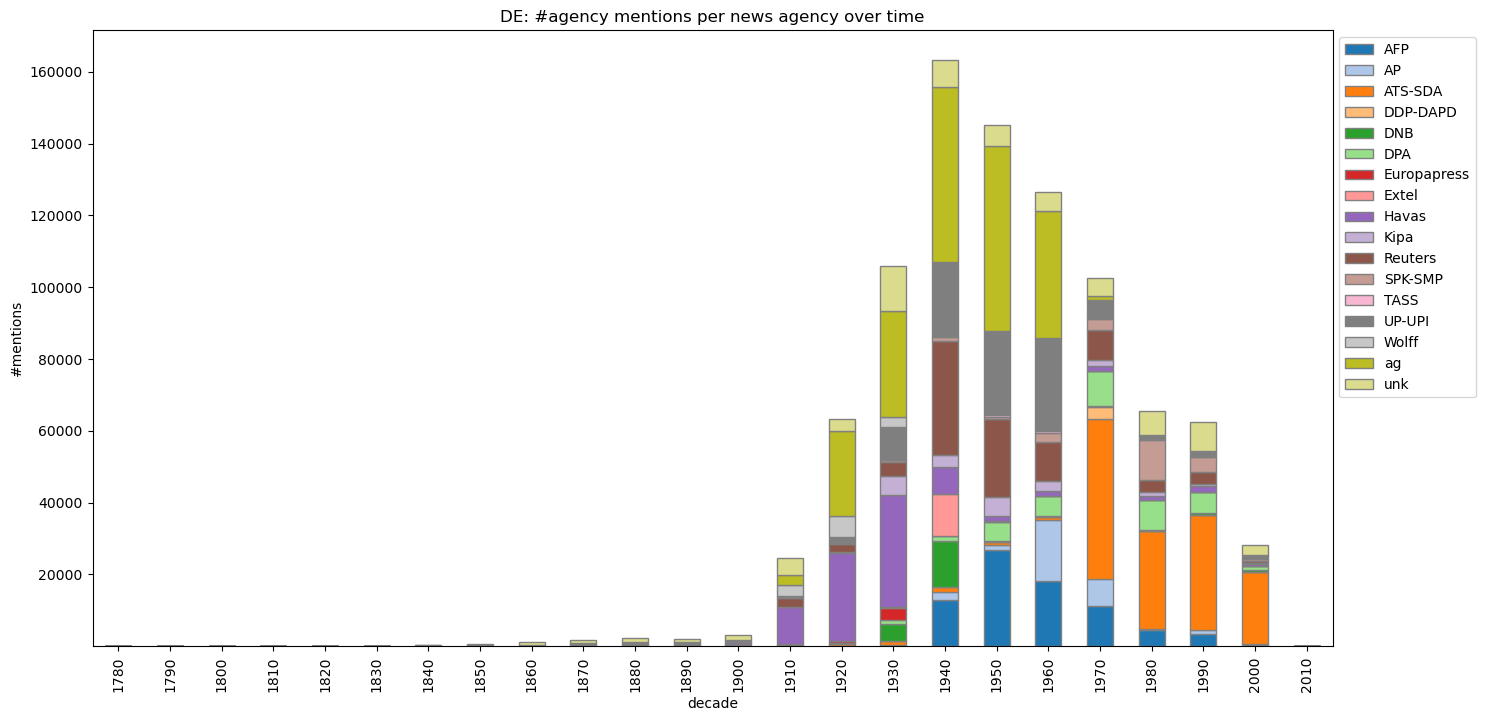

In [16]:
#specifying colors for agencies
agencies = sorted(mentions_all['agency'].unique())
colors = plt.cm.tab20
clist = [colors(i) for i in range(colors.N)]
custom_cmap = dict(zip(agencies, clist[:len(agencies)]))

#French
na_per_decade_fr = pd.pivot_table(mentions_fr, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_fr.plot(kind="bar", stacked=True, figsize=(16,8), ylabel="#mentions", title="FR: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#German
na_per_decade_de = pd.pivot_table(mentions_de, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_de.plot(kind="bar", stacked=True, figsize=(16,8), ylabel="#mentions", title="DE: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Plot
plt.show()

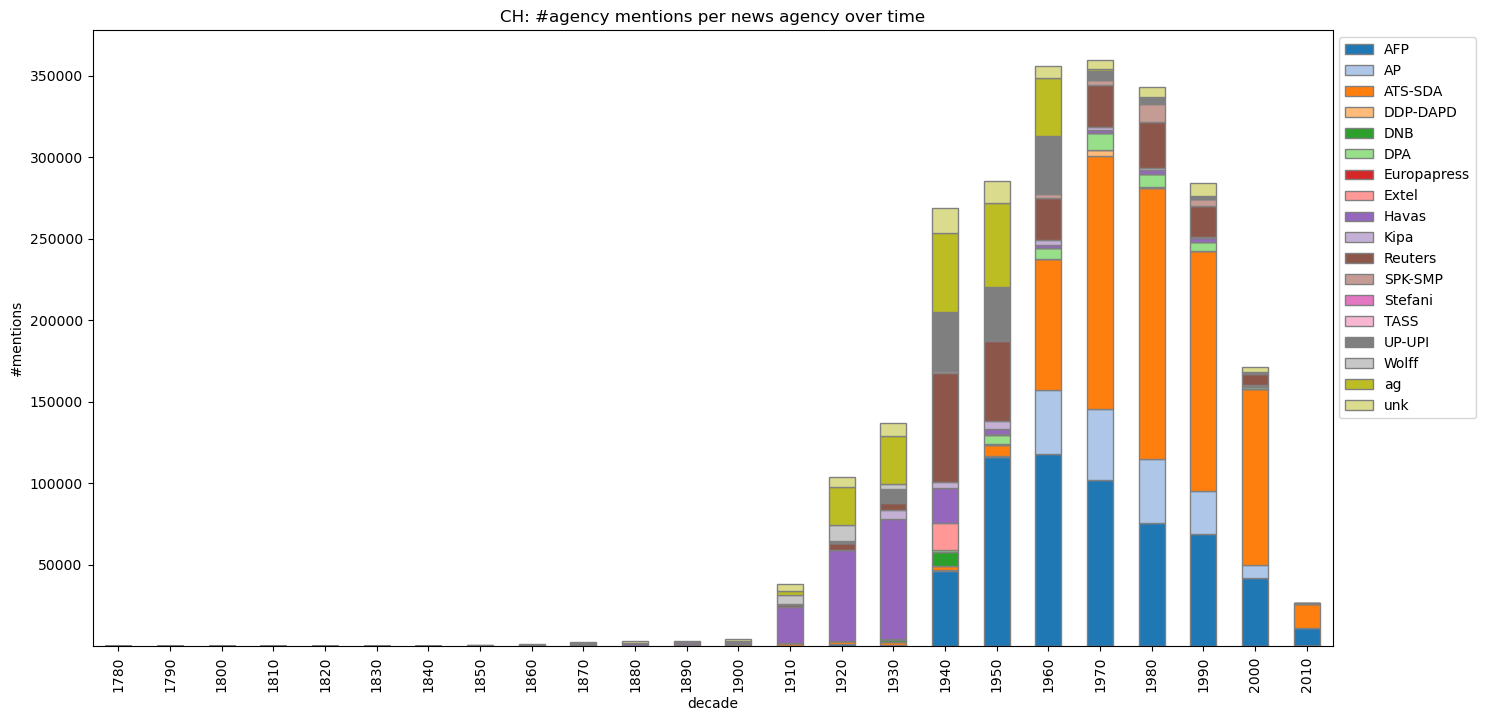

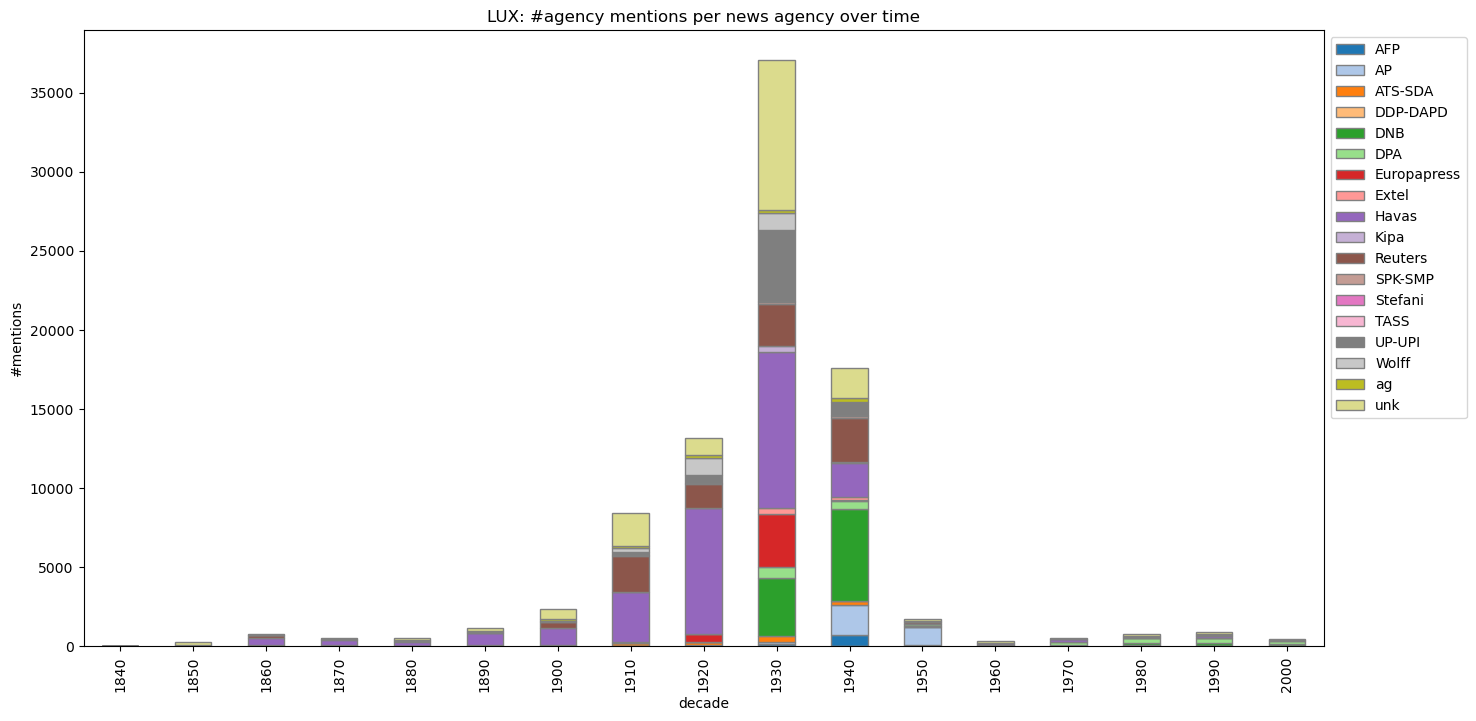

In [17]:
#Switzerland
na_per_decade_ch = pd.pivot_table(mentions_all[mentions_all['country']=='CH'], index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_ch.plot(kind="bar", stacked=True, figsize=(16,8), ylabel="#mentions", title="CH: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Luxembourg
na_per_decade_lux = pd.pivot_table(mentions_all[mentions_all['country']=='LU'], index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_lux.plot(kind="bar", stacked=True, figsize=(16,8), ylabel="#mentions", title="LUX: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Plot
plt.show()

### Newspapers

In [33]:
def plot_np_over_time(df, np, cmap=custom_cmap):
    np_per_dec = pd.pivot_table(df[df['newspaper']==np], index="decade", columns="agency", values="article", aggfunc="count")

    np_per_dec.plot(kind="bar", stacked=True, figsize=(12,6), ylabel="#mentions", title=f"{np}: #agency mentions per news agency over time", color=cmap, edgecolor="grey")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

Most frequent Swiss newspapers:
FZG    468834
EXP    393964
JDG    319198
IMP    287795
GDL    261289
Name: newspaper, dtype: int64


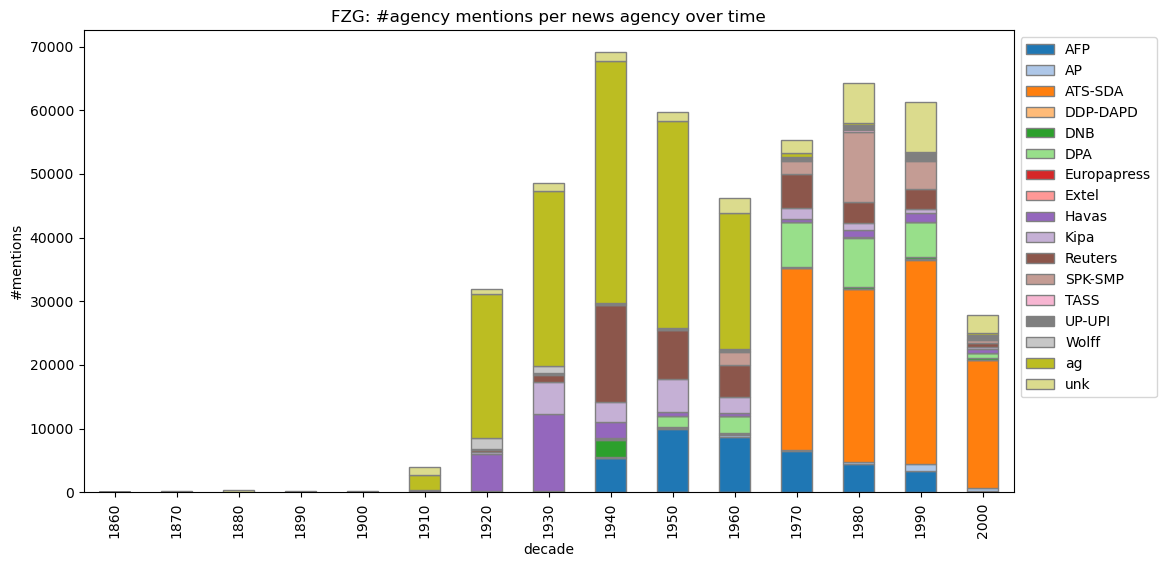

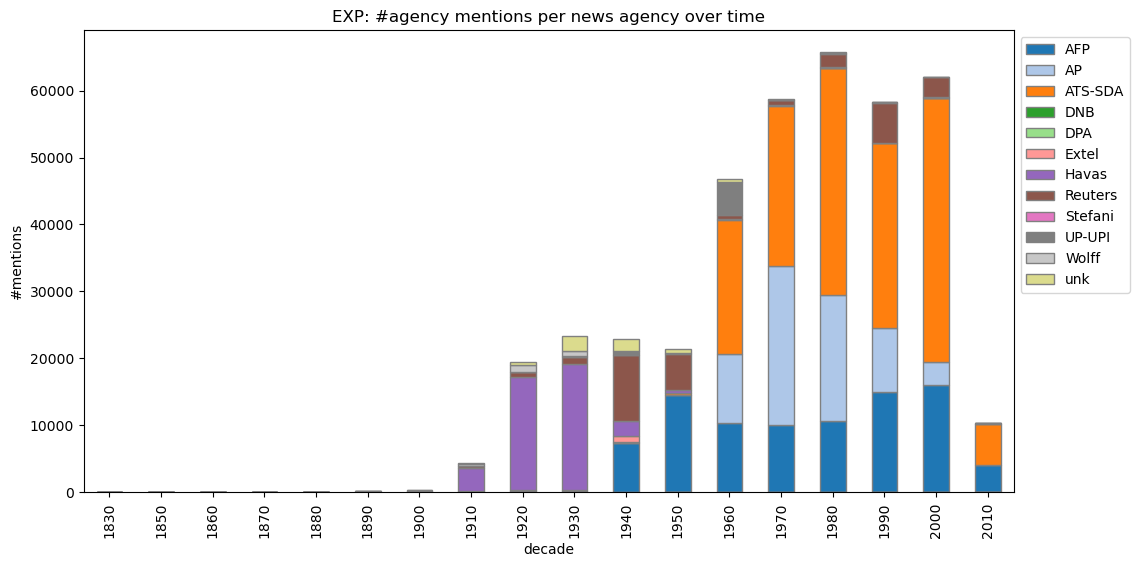

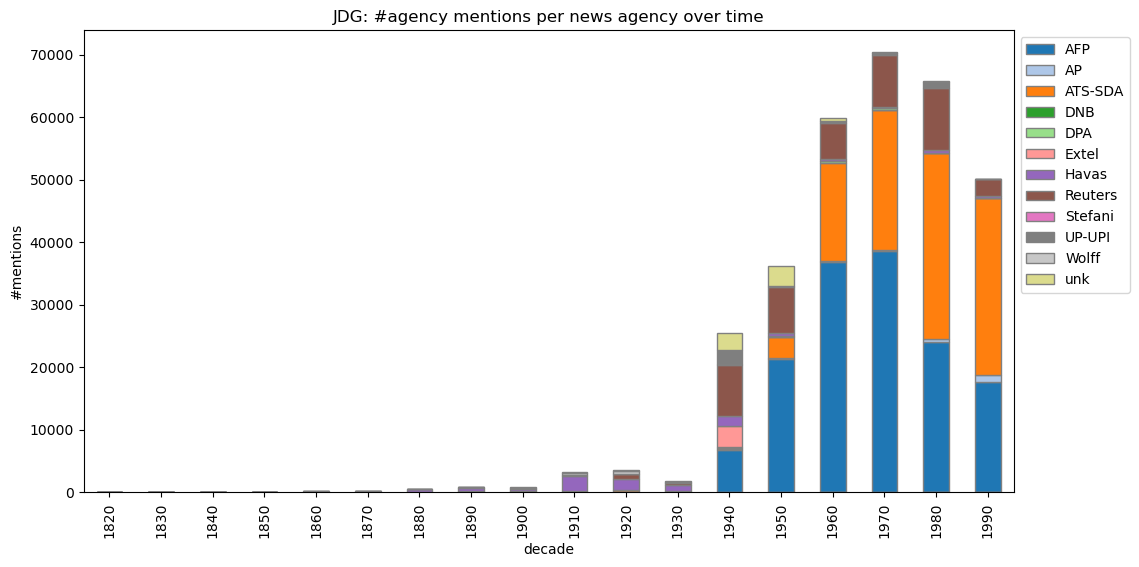

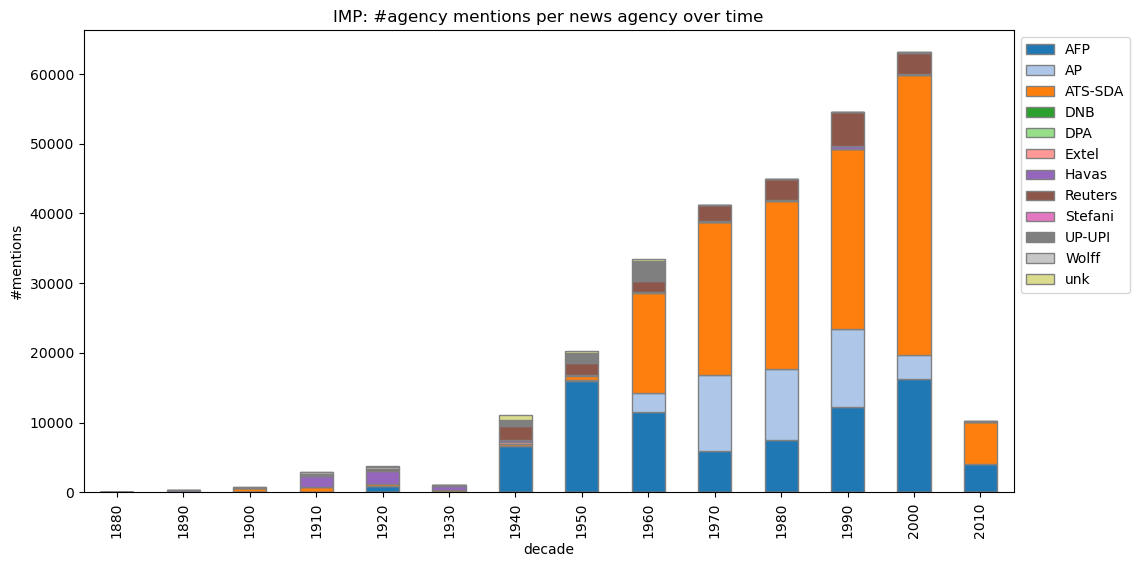

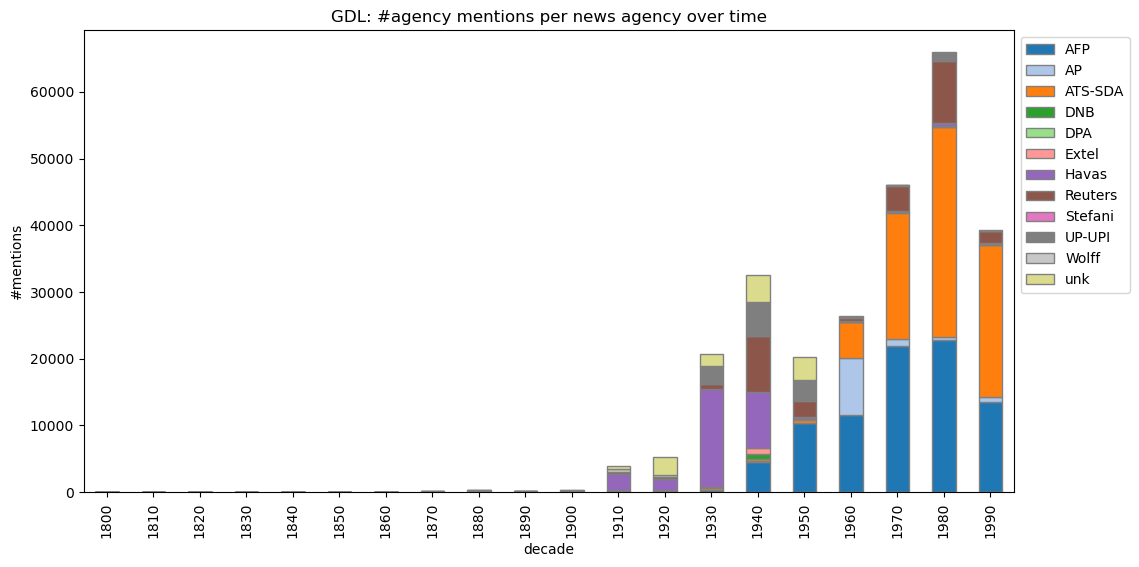

In [40]:
#Swiss Newspapers
freq_np_CH = mentions_all.loc[mentions_all['country']=="CH", 'newspaper'].value_counts()[:5]
print(f"Most frequent Swiss newspapers:\n{freq_np_CH}")

for newspaper in freq_np_CH.index:
    plot_np_over_time(mentions_all, newspaper)

plt.show()

Most frequent Luxembourgish newspapers:
luxwort           56937
obermosel         12306
luxembourg1935     4276
tageblatt          4165
indeplux           3055
Name: newspaper, dtype: int64


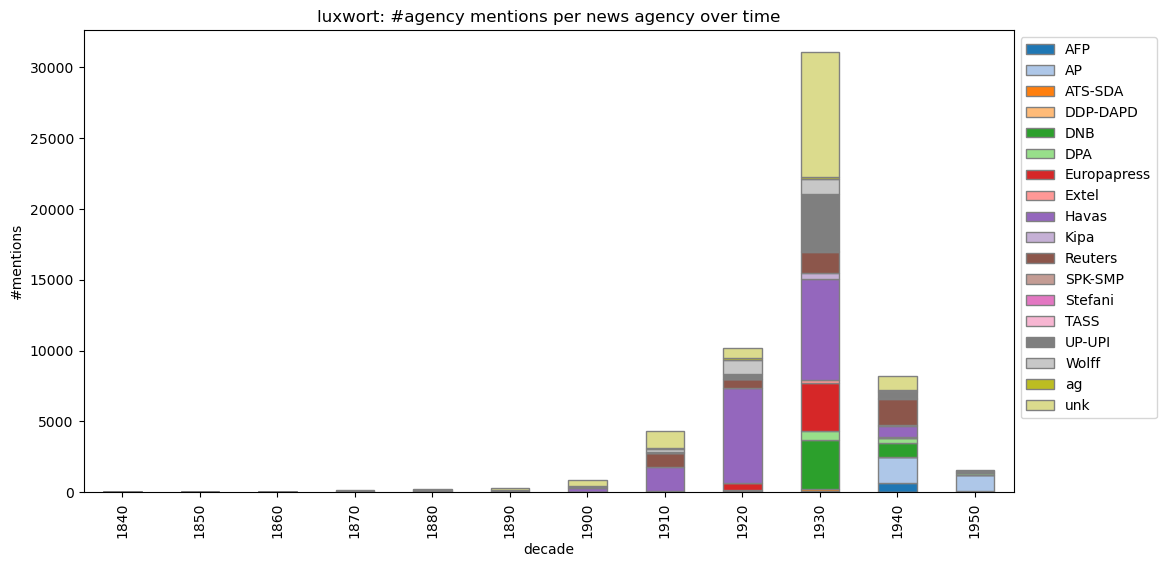

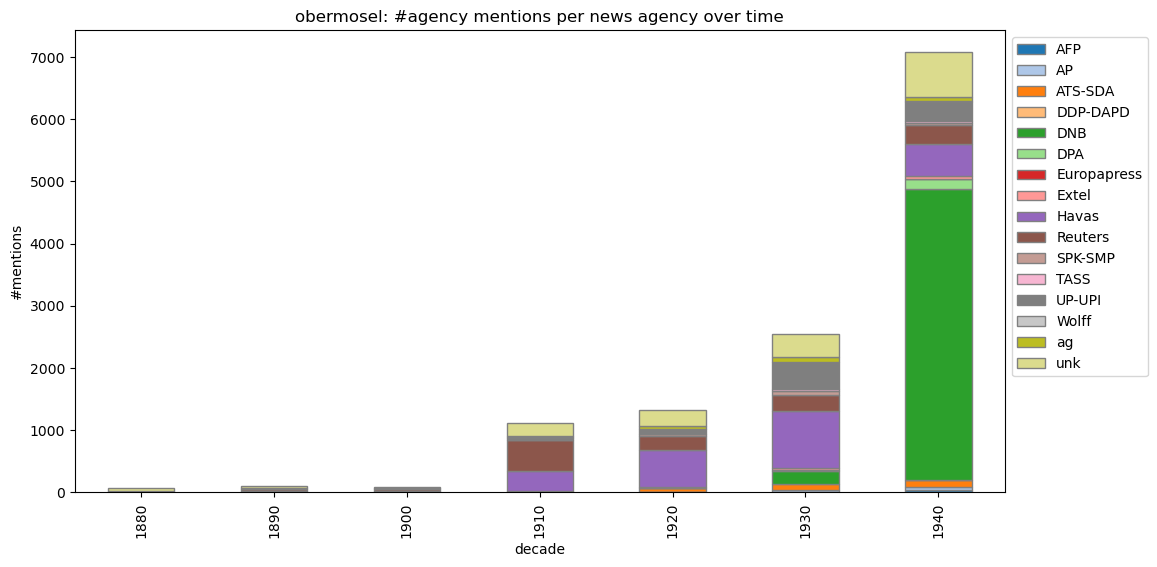

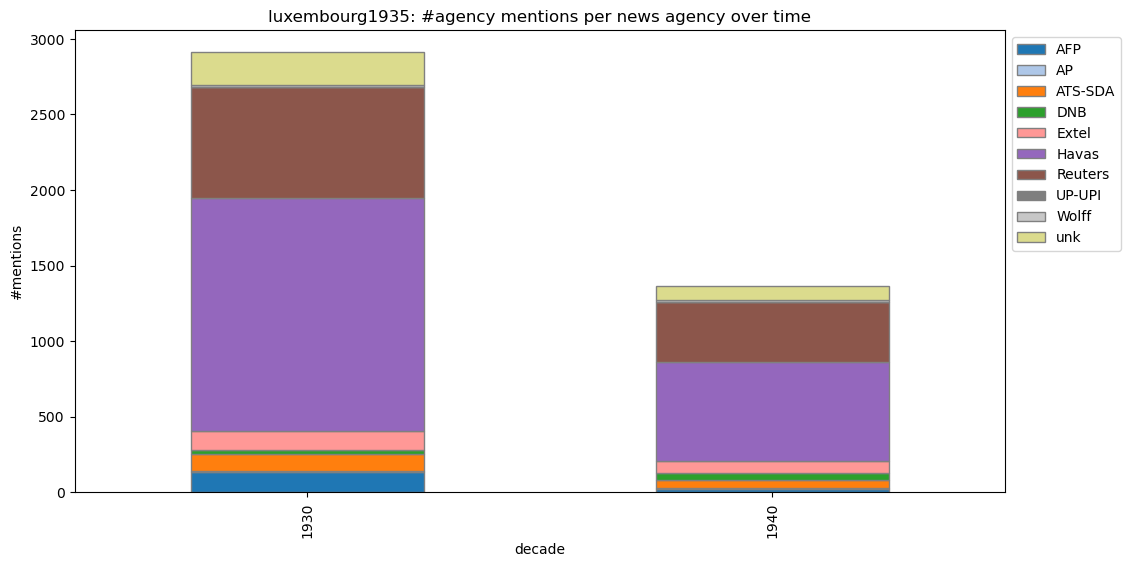

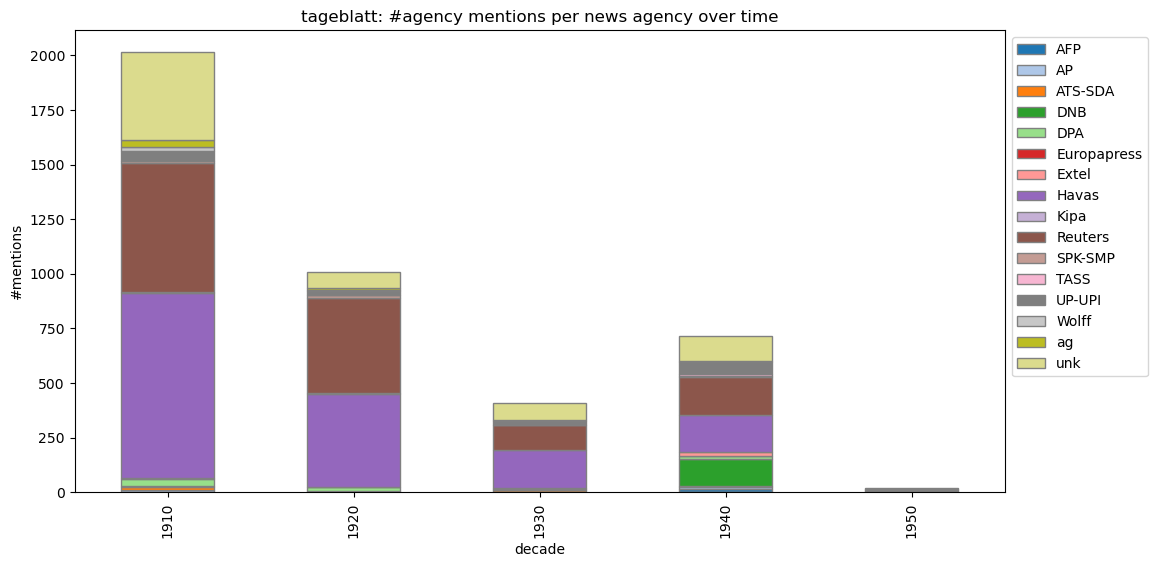

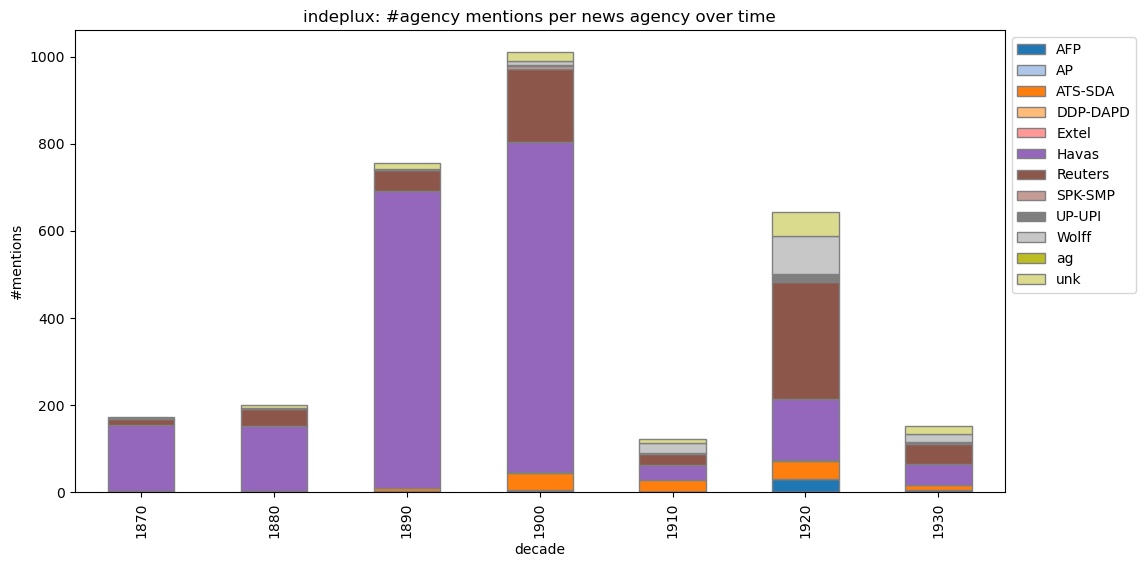

In [41]:
#Luxembourgish Newspapers
freq_np_LUX = mentions_all.loc[mentions_all['country']=="LU", 'newspaper'].value_counts()[:5]
print(f"Most frequent Luxembourgish newspapers:\n{freq_np_LUX}")

for newspaper in freq_np_LUX.index:
    plot_np_over_time(mentions_all, newspaper)

plt.show()

## Multiple Agency Mentions per Article

In [19]:
multiple_ag = mentions_all.groupby(['article', 'sentence_idx:']).agg({
    'agency': list,
    'surface': list,
    'id': list,
    'lSentenceOffset': list,
    'language': 'first',
    'newspaper': 'first',
    'year': 'first',
    'decade': 'first',
}).reset_index()
#only save entries with multiple agencies per sentence
multiple_ag = multiple_ag[multiple_ag['agency'].str.len() > 2]
multiple_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
465,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
2208,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
2318,DTT-1940-01-29-a-i0007,28,"[ag, Reuters, Havas]","[ag., Reuter, Havas]",[DTT-1940-01-29-a-i0007:28:-1:2:4222:4225:news...,"[-1, 247, 394]",de,DTT,1940,1940
2984,DTT-1940-03-14-a-i0004,1,"[ag, Havas, Havas]","[ag., Agentur, Havas]",[DTT-1940-03-14-a-i0004:1:-1:2:96:99:newsag:be...,"[-1, 20, 28]",de,DTT,1940,1940
3080,DTT-1940-03-21-a-i0005,5,"[ag, Havas, Havas]","[ag., Agenur, Havas]",[DTT-1940-03-21-a-i0005:5:-1:2:276:279:newsag:...,"[-1, 20, 27]",de,DTT,1940,1940


In [20]:
multiple_ag['agency'].value_counts()[:50]

[ATS-SDA, AFP, Reuters]         8604
[ATS-SDA, Reuters, AFP]         1259
[ATS-SDA, DPA, AFP]              904
[ATS-SDA, DPA, Reuters]          782
[ATS-SDA, AFP, DPA, Reuters]     665
[ATS-SDA, AFP, DPA]              650
[ATS-SDA, AFP, AP]               571
[AFP, AFP, AFP]                  546
[ATS-SDA, DPA, AFP, Reuters]     505
[ATS-SDA, Reuters, DPA]          466
[ATS-SDA, DPA, Reuters, AFP]     442
[ATS-SDA, ATS-SDA, ATS-SDA]      380
[ATS-SDA, Reuters, DPA, AFP]     368
[ATS-SDA, Reuters, AFP, DPA]     330
[ATS-SDA, AFP, Reuters, DPA]     259
[ATS-SDA, ATS-SDA, AFP]          238
[AP, ATS-SDA, AFP]               217
[AFP, AFP, AFP, AFP]             209
[ATS-SDA, AFP, ATS-SDA]          203
[ATS-SDA, ATS-SDA, Reuters]      197
[AFP, Reuters, AP]               196
[AP, AFP, Reuters]               143
[ATS-SDA, AFP, Reuters, AP]      114
[ATS-SDA, Reuters, AP]           110
[AFP, AFP, Reuters]              106
[Havas, Havas, Havas]            106
[ag, Havas, ag, Havas]           100
[

-> question if sentence segmentation is good enough

In [21]:
multiple_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
465,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
2208,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
2318,DTT-1940-01-29-a-i0007,28,"[ag, Reuters, Havas]","[ag., Reuter, Havas]",[DTT-1940-01-29-a-i0007:28:-1:2:4222:4225:news...,"[-1, 247, 394]",de,DTT,1940,1940
2984,DTT-1940-03-14-a-i0004,1,"[ag, Havas, Havas]","[ag., Agentur, Havas]",[DTT-1940-03-14-a-i0004:1:-1:2:96:99:newsag:be...,"[-1, 20, 28]",de,DTT,1940,1940
3080,DTT-1940-03-21-a-i0005,5,"[ag, Havas, Havas]","[ag., Agenur, Havas]",[DTT-1940-03-21-a-i0005:5:-1:2:276:279:newsag:...,"[-1, 20, 27]",de,DTT,1940,1940


In [22]:
len(multiple_ag)

23557

In [23]:
def get_ag_in_same_sent(row, distance=30):
    loffset = row['lSentenceOffset']
    #pair each offset with the next one
    paired_offsets = zip(loffset[:-1], loffset[1:])

    same_sent_pos = set()
    for pos, pair in enumerate(paired_offsets):
        if abs(pair[1] - pair[0]) <= distance:
            #save position in original list
            same_sent_pos.add(pos)
            same_sent_pos.add(pos + 1)

    return sorted(list(same_sent_pos))

In [24]:
mult_close_ag = multiple_ag.copy()
len_multiple_before = len(mult_close_ag)
print(f"#Sentences (df rows) before deletion of mentions which are too far apart: {len_multiple_before}")

#get all entries which are close to each other in one sentence
mult_close_ag['close_entries_pos'] = mult_close_ag.apply(get_ag_in_same_sent, axis=1)

#delete all sentences/df rows where no mention close to one another
mult_close_ag = mult_close_ag[mult_close_ag['close_entries_pos'].str.len() > 0]
print(f"Interim: #Sentences with no two mentions close to each other: {len_multiple_before - len(mult_close_ag)}")

#delete all mentions which are not close to one another
for col in ['agency', 'surface', 'id', 'lSentenceOffset']:
    mult_close_ag[col] = mult_close_ag.apply(lambda x: [x[col][i] for i in x['close_entries_pos']], axis=1)

print(f"#Sentences (df rows) after deletion of mentions which are too far apart: {len(mult_close_ag)} (deleted rows: {len_multiple_before - len(mult_close_ag)})")
mult_close_ag = mult_close_ag.drop(columns='close_entries_pos')

#Sentences (df rows) before deletion of mentions which are too far apart: 23557
Interim: #Sentences with no two mentions close to each other: 1095
#Sentences (df rows) after deletion of mentions which are too far apart: 22462 (deleted rows: 1095)


In [25]:
mult_close_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
465,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
2208,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
2984,DTT-1940-03-14-a-i0004,1,"[ag, Havas, Havas]","[ag., Agentur, Havas]",[DTT-1940-03-14-a-i0004:1:-1:2:96:99:newsag:be...,"[-1, 20, 28]",de,DTT,1940,1940
3080,DTT-1940-03-21-a-i0005,5,"[ag, Havas, Havas]","[ag., Agenur, Havas]",[DTT-1940-03-21-a-i0005:5:-1:2:276:279:newsag:...,"[-1, 20, 27]",de,DTT,1940,1940
3164,DTT-1940-03-28-a-i0008,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-03-28-a-i0008:1:-1:2:93:96:newsag:be...,"[-1, 20, 28]",de,DTT,1940,1940


In [26]:
mult_close_ag['agency'].value_counts()

[ATS-SDA, AFP, Reuters]         8350
[ATS-SDA, Reuters, AFP]         1241
[ATS-SDA, DPA, AFP]              905
[ATS-SDA, DPA, Reuters]          788
[ATS-SDA, AFP, DPA, Reuters]     661
                                ... 
[unk, unk, Kipa]                   1
[unk, unk, AFP]                    1
[AFP, unk, Reuters]                1
[DPA, AFP, DPA]                    1
[Reuters, unk, Havas]              1
Name: agency, Length: 778, dtype: int64

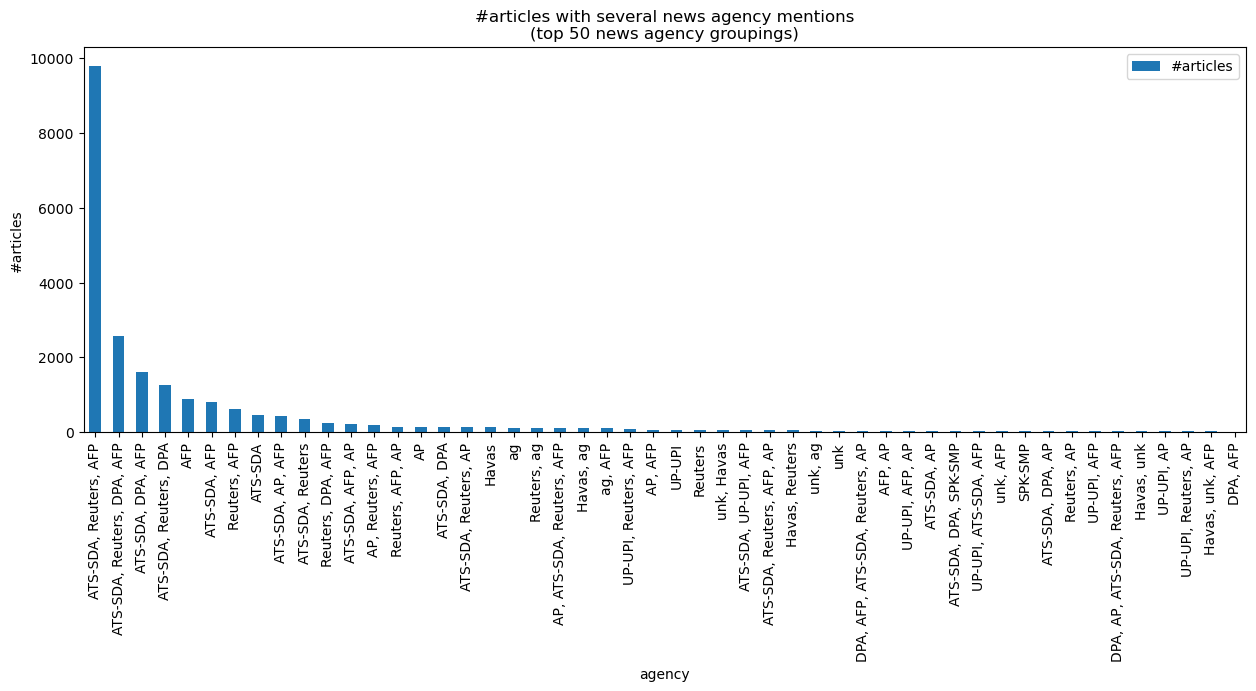

In [27]:
na_mult_grouped = mult_close_ag.copy()[['id', 'agency']]
na_mult_grouped['agency'] = na_mult_grouped['agency'].apply(lambda x: ", ".join(set(x)))
na_mult_grouped = na_mult_grouped.groupby("agency").count().rename({"id":"#articles"}, axis=1)
na_mult_grouped.nlargest(50, "#articles").plot(kind="bar", ylabel="#articles", title="#articles with several news agency mentions\n(top 50 news agency groupings)", figsize=(15,5))
plt.show()

In [28]:
mult_close_ag['newspaper'].value_counts()

FZG               7974
IMP               7119
EXP               4241
JDG                919
GDL                902
LLE                523
DTT                385
NZZ                266
luxwort             42
obermosel           26
LSE                 18
tageblatt           11
LCE                 10
indeplux             6
buergerbeamten       4
VHT                  3
luxembourg1935       3
luxland              3
LLS                  2
LCR                  1
LTF                  1
SDT                  1
SMZ                  1
courriergdl          1
Name: newspaper, dtype: int64

In [29]:
articles['newspaper'].value_counts()

EXP             240182
JDG             211033
IMP             186114
GDL             168514
FZG             164135
                 ...  
EDA                  3
BLB                  3
demitock             2
landwortbild         1
JDV                  1
Name: newspaper, Length: 68, dtype: int64

## Save dataframes

In [30]:
pd.to_pickle(articles_fr, output_path + "articles_fr.pkl")
pd.to_pickle(articles_de, output_path + "articles_de.pkl")
pd.to_pickle(mentions_fr, output_path + "mentions_fr.pkl")
pd.to_pickle(mentions_de, output_path + "mentions_de.pkl")